# Pytorch Classification Exercises

# Binary Classification Problem

## make_circles

This a non-linearity binary classification problem from Scikit Learn [data sets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html)

### 1. Get the data

In [6]:
# Make device agnostic code
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [7]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)
X[:10], y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

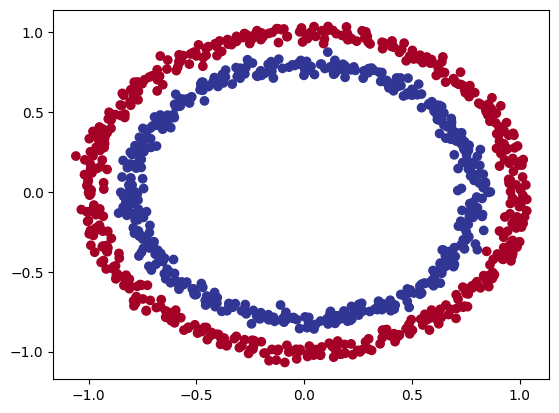

In [8]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

In [9]:
# Convert data to tensors and then to train and test splits
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X.dtype, y.dtype

(torch.float32, torch.float32)

In [10]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [11]:
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [12]:
X_train[:5]

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]])

In [13]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

### 2. Build a model

In [14]:
# Build a model with non-linear activation functions
from torch import nn
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 20)
    self.layer_2 = nn.Linear(in_features = 20, out_features = 30)
    self.layer_3 = nn.Linear(in_features = 30, out_features = 10)
    self.layer_4 = nn.Linear(in_features = 10, out_features = 1)
    self.relu = nn.ReLU() # relu is a non-linear activation function

  def forward(self, x):
    return self.layer_4(self.relu(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))))

In [15]:
model_1 = CircleModel()
model_1

CircleModel(
  (layer_1): Linear(in_features=2, out_features=20, bias=True)
  (layer_2): Linear(in_features=20, out_features=30, bias=True)
  (layer_3): Linear(in_features=30, out_features=10, bias=True)
  (layer_4): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [16]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_1.parameters(),
                            lr = 0.1)

In [17]:
# Let's visualize the parameters
list(model_1.parameters())

[Parameter containing:
 tensor([[-0.4816, -0.4364],
         [ 0.1444,  0.3631],
         [-0.2617, -0.6948],
         [-0.4015, -0.2997],
         [ 0.0354,  0.4316],
         [-0.5227, -0.6020],
         [ 0.1695,  0.0488],
         [ 0.6057, -0.2721],
         [-0.6301, -0.2939],
         [ 0.6247,  0.1502],
         [ 0.2291, -0.0093],
         [ 0.5538, -0.5049],
         [-0.2867,  0.4178],
         [ 0.1847,  0.6489],
         [ 0.5682, -0.6088],
         [-0.0989, -0.7024],
         [ 0.6131, -0.5730],
         [-0.0032,  0.4012],
         [ 0.5925,  0.2014],
         [ 0.2839, -0.5888]], requires_grad=True),
 Parameter containing:
 tensor([ 0.6386, -0.2173, -0.1119, -0.4361, -0.2068, -0.5462,  0.4588,  0.3967,
         -0.3779, -0.1237,  0.3237,  0.1128,  0.0980,  0.0844, -0.0185,  0.6583,
         -0.4379,  0.5702,  0.3622,  0.5782], requires_grad=True),
 Parameter containing:
 tensor([[-0.1076, -0.2073, -0.0339,  0.2052, -0.2006, -0.1620,  0.1841, -0.0692,
          -0.0376,

### 3. Train the model

In [18]:
# Random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through data
epochs = 1000

for epoch in range(epochs):
  ### Training
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  # 3. Optimizer zero grad (we do zero the gradients from the optimizer)
  optimizer.zero_grad()

  # 4. Loss backwards (backpropagation)
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)
  # Print out what is happening
  if epoch % 100 == 0:
    print(f'Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f} | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%')

Epoch: 0 | Loss: 0.7034, Acc: 50.00 | Test Loss: 0.7029, Test Acc: 50.00%
Epoch: 100 | Loss: 0.6918, Acc: 53.25 | Test Loss: 0.6921, Test Acc: 48.00%
Epoch: 200 | Loss: 0.6905, Acc: 54.87 | Test Loss: 0.6909, Test Acc: 54.50%
Epoch: 300 | Loss: 0.6880, Acc: 56.62 | Test Loss: 0.6890, Test Acc: 58.50%
Epoch: 400 | Loss: 0.6833, Acc: 57.25 | Test Loss: 0.6856, Test Acc: 59.50%
Epoch: 500 | Loss: 0.6738, Acc: 59.38 | Test Loss: 0.6785, Test Acc: 62.00%
Epoch: 600 | Loss: 0.6457, Acc: 76.62 | Test Loss: 0.6569, Test Acc: 69.50%
Epoch: 700 | Loss: 0.5283, Acc: 96.38 | Test Loss: 0.5554, Test Acc: 91.00%
Epoch: 800 | Loss: 0.4518, Acc: 68.25 | Test Loss: 0.5042, Test Acc: 63.50%
Epoch: 900 | Loss: 0.3455, Acc: 81.25 | Test Loss: 0.4041, Test Acc: 73.50%


### 4. Evaluating the model

In [19]:
# Makes predictions
model_1.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_1(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [20]:
import requests
from pathlib import Path

# Download helper function from Learn Pytorch repo (if it's not already downloaded)
if Path('helper_functions.py').is_file():
  print('helper_functions.py already exists, skipping download')
else:
  print('Download helper_functions.py')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/af6548e52663c8395fe2777bd0fbfd6ac85fd6f8/helper_functions.py')
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

Download helper_functions.py


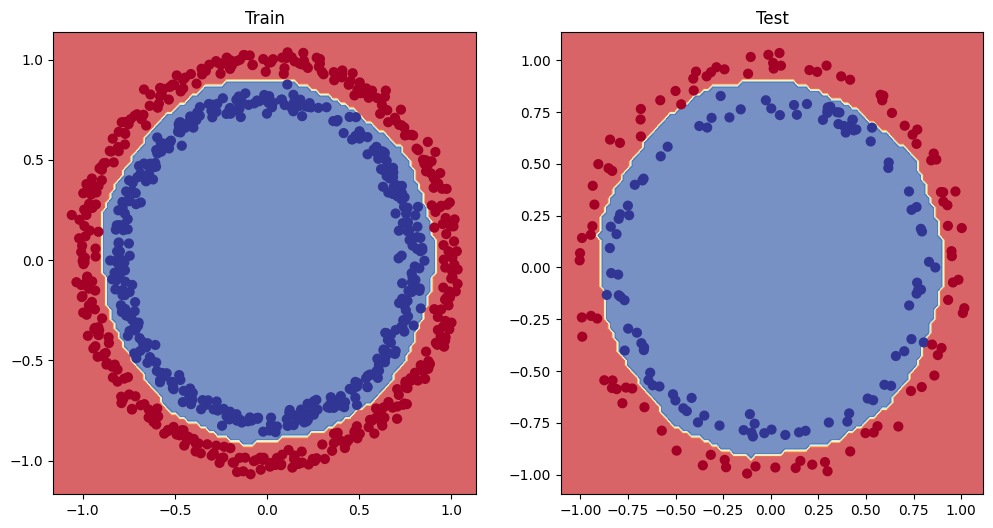

In [21]:
from helper_functions import plot_predictions, plot_decision_boundary
# Plot decision boudaries
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_1, X_test, y_test)

## make_moons

This is a non-linearity multi-class classification problem from Scikit learn [dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html)

### 1. Get data

In [22]:
from sklearn.datasets import make_moons
import pandas as pd

N_SAMPLES = 1000
RANDOM_SEED = 42

X, y = make_moons(n_samples = N_SAMPLES,
                  noise = 0.07,
                  random_state = RANDOM_SEED)
X[:5], y[:5]

(array([[-0.03341062,  0.4213911 ],
        [ 0.99882703, -0.4428903 ],
        [ 0.88959204, -0.32784256],
        [ 0.34195829, -0.41768975],
        [-0.83853099,  0.53237483]]),
 array([1, 1, 1, 1, 0]))

In [23]:
# Visualize the data in a datframe
df = pd.DataFrame({'x1': X[:, 0],
                   'X2': X[:, 1],
                   'y': y})
df.head()

,x1,X2,y
0,-0.033411,0.421391,1
1,0.998827,-0.442890,1
2,0.889592,-0.327843,1
3,0.341958,-0.417690,1
4,-0.838531,0.532375,0


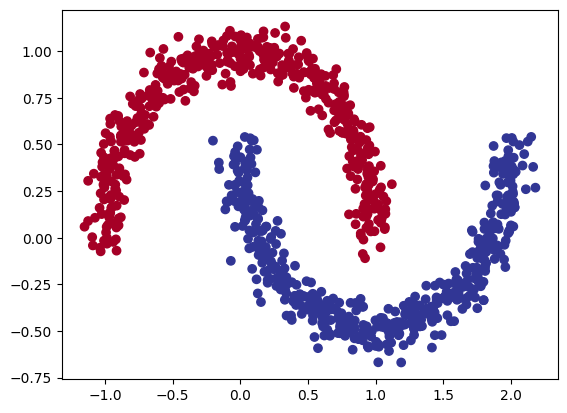

In [24]:
# Visualize the data on a scatter plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

In [25]:
# Turn data into tensors of dtype float
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = RANDOM_SEED)

In [26]:
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

### 2. Build a model

In [27]:
import torch
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    def __init__(self, input_features, output_features, hidden_units):
      super().__init__()
      self.layer_1 = nn.Linear(in_features = input_features, out_features = hidden_units)
      self.layer_2 = nn.Linear(in_features = hidden_units, out_features = hidden_units)
      self.layer_3 = nn.Linear(in_features = hidden_units, out_features = hidden_units)
      self.layer_4 = nn.Linear(in_features = hidden_units, out_features = output_features)
      self.relu = nn.ReLU()

    def forward(self, x):
        ## Your code here ##
        return self.layer_4(self.relu(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))))

# Instantiate the model
model_3 = MoonModelV0(input_features = 2,
                    output_features = 1,
                    hidden_units = 10).to(device)

In [28]:
list(model_3.parameters())

[Parameter containing:
 tensor([[ 0.5406,  0.5869],
         [-0.1657,  0.6496],
         [-0.1549,  0.1427],
         [-0.3443,  0.4153],
         [ 0.6233, -0.5188],
         [ 0.6146,  0.1323],
         [ 0.5224,  0.0958],
         [ 0.3410, -0.0998],
         [ 0.5451,  0.1045],
         [-0.3301,  0.1802]], requires_grad=True),
 Parameter containing:
 tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
          0.0667, -0.6984], requires_grad=True),
 Parameter containing:
 tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
           0.0346, -0.0997],
         [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
           0.1606, -0.1927],
         [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310,  0.1000, -0.0055,
           0.2475, -0.2247],
         [ 0.0199, -0.2158,  0.0975, -0.1089,  0.0969, -0.0659,  0.2623, -0.1874,
          -0.1886, -0.1886],
         [ 0.2844,  0.1054,  0.3043, -0.2610,

### 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [29]:
# Setup loss function
loss_fn = nn.BCEWithLogitsLoss()
# Setup optimizer to optimize model's parameters
optimizer = torch.optim.SGD(params = model_3.parameters(),
                           lr = 0.1)

### 4. Create a raining and testing loop

What's coming out of our model?. Visualize without training

In [30]:
# logits (raw outputs of model)
print("Logits:")
print(model_3(X_train.to(device)[:10]).squeeze())
# Prediction probabilities
print("Pred probs:")
print(torch.sigmoid(model_3(X_train.to(device))[:10]).squeeze())
# Prediction labels
print("Pred labels:")
print(torch.round(torch.sigmoid(model_3(X_train.to(device)))[:10]).squeeze())

Logits:
tensor([0.1624, 0.2075, 0.2037, 0.2031, 0.2111, 0.2058, 0.2113, 0.2113, 0.1882,
        0.2093], grad_fn=<SqueezeBackward0>)
Pred probs:
tensor([0.5405, 0.5517, 0.5507, 0.5506, 0.5526, 0.5513, 0.5526, 0.5526, 0.5469,
        0.5521], grad_fn=<SqueezeBackward0>)
Pred labels:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SqueezeBackward0>)


In [31]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
!pip -q install torchmetrics # Colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: Uncomment this code to use the Accuracy function
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
acc_fn

MulticlassAccuracy()

In [32]:
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

# Setup epochs
epochs = 1000

# Send data to the device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through the data
for epoch in range(epochs):
  ### Training
  model_3.train()

  # 1. Forward pass (logits output)
  y_logits = model_3(X_train).squeeze()
  # Turn logits into prediction probabilities
  y_pred_probs = torch.sigmoid(y_logits)

  # Turn prediction probabilities into prediction labels
  y_pred = torch.round(y_pred_probs)

  # 2. Calculaute the loss
  loss = loss_fn(y_logits, y_train) # loss = compare model raw outputs to desired model outputs

  # Calculate the accuracy
  acc = acc_fn(y_pred, y_train.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels

  # 3. Zero the gradients
  optimizer.zero_grad()

  # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
  loss.backward()
  # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression)
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    # 1. Forward pass (to get the logits)
    model_3.eval()
    test_logits = model_3(X_test).squeeze()
    # Turn the test logits into prediction labels
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Caculate the test loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(test_pred, y_test.int())

  # Print out what's happening every 100 epochs
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.2f} Acc: {acc:.2f} | Test loss: {test_loss:.2f} Test acc: {test_acc:.2f}")

Epoch: 0 | Loss: 0.70 Acc: 0.50 | Test loss: 0.70 Test acc: 0.50
Epoch: 100 | Loss: 0.60 Acc: 0.81 | Test loss: 0.60 Test acc: 0.79
Epoch: 200 | Loss: 0.25 Acc: 0.89 | Test loss: 0.25 Test acc: 0.89
Epoch: 300 | Loss: 0.16 Acc: 0.94 | Test loss: 0.15 Test acc: 0.95
Epoch: 400 | Loss: 0.07 Acc: 0.99 | Test loss: 0.06 Test acc: 1.00
Epoch: 500 | Loss: 0.03 Acc: 1.00 | Test loss: 0.02 Test acc: 1.00
Epoch: 600 | Loss: 0.01 Acc: 1.00 | Test loss: 0.01 Test acc: 1.00
Epoch: 700 | Loss: 0.01 Acc: 1.00 | Test loss: 0.01 Test acc: 1.00
Epoch: 800 | Loss: 0.01 Acc: 1.00 | Test loss: 0.01 Test acc: 1.00
Epoch: 900 | Loss: 0.01 Acc: 1.00 | Test loss: 0.00 Test acc: 1.00


### 5. Make predictions

In [33]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

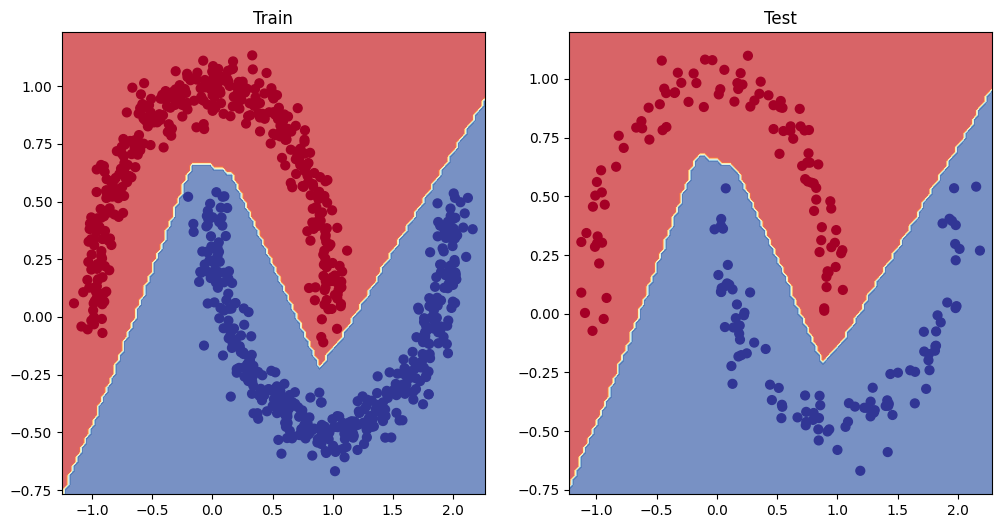

In [34]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

# Multi-Class Classification Problem

## make_blobs

This is a non-linearity multi-class classification problem from Scikit learn [dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)

### 1. Get the data

In [35]:
# Import Dependencis
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from torch import nn

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features = NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 1.5, # give the clusters a little shake up
                            random_state = RANDOM_SEED)
X_blob[:5], y_blob[:5]

(array([[-8.41339595,  6.93516545],
        [-5.76648413, -6.43117072],
        [-6.04213682, -6.76610151],
        [ 3.95083749,  0.69840313],
        [ 4.25049181, -0.28154475]]),
 array([3, 2, 2, 1, 1]))

In [36]:
# 2. Turn data into tensor
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob[:5], y_blob[:5]

(tensor([[-8.4134,  6.9352],
         [-5.7665, -6.4312],
         [-6.0421, -6.7661],
         [ 3.9508,  0.6984],
         [ 4.2505, -0.2815]]),
 tensor([3, 2, 2, 1, 1]))

In [37]:
# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size = 0.2,
                                                                        random_state = RANDOM_SEED)
len(X_blob_train), len(y_blob_train), len(X_blob_test), len(y_blob_test)

(800, 800, 200, 200)

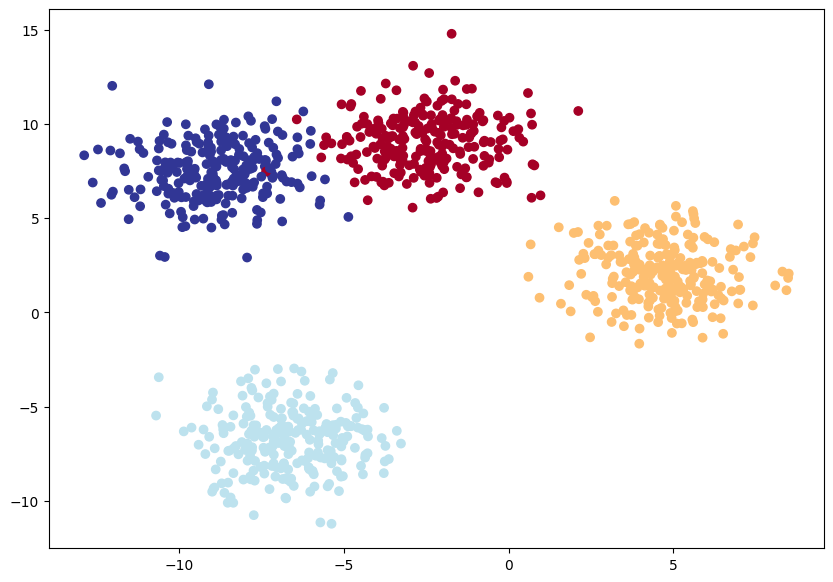

In [38]:
# 4. Plot data
plt.figure(figsize = (10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c = y_blob, cmap = plt.cm.RdYlBu)

In [39]:
import requests
from pathlib import Path

# Download helper function from Learn Pytorch repo (if it's not already downloaded)
if Path('helper_functions.py').is_file():
  print('helper_functions.py already exists, skipping download')
else:
  print('Download helper_functions.py')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/af6548e52663c8395fe2777bd0fbfd6ac85fd6f8/helper_functions.py')
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [40]:
from helper_functions import plot_predictions, plot_decision_boundary

### 2. Build a multi-class classificaiton model

In [41]:
# Create device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [42]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 8):
    """
    Initializes multi-class classification model.
    Args:
      input_features (int): Number of input features to the model.
      output_features (int): Number of outputs features. (number of output classes)
      hidden_units (int): Number of hidden units (neurons) between layers, default 8.
    Returns:
    Example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features = hidden_units),
        nn.ReLU(), # try the model without RelU
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

In [43]:
# Create an isntance of BlobModel and sen it to the target device
model_2 = BlobModel(input_features = NUM_FEATURES,
                  output_features = NUM_CLASSES,
                  hidden_units = 8).to(device)

In [44]:
model_2

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [45]:
# Let's visualize the parameters
list(model_2.parameters())

[Parameter containing:
 tensor([[ 0.5406,  0.5869],
         [-0.1657,  0.6496],
         [-0.1549,  0.1427],
         [-0.3443,  0.4153],
         [ 0.6233, -0.5188],
         [ 0.6146,  0.1323],
         [ 0.5224,  0.0958],
         [ 0.3410, -0.0998]], requires_grad=True),
 Parameter containing:
 tensor([ 0.5451,  0.1045, -0.3301,  0.1802, -0.3258, -0.0829, -0.2872,  0.4691],
        requires_grad=True),
 Parameter containing:
 tensor([[-0.2791, -0.1630, -0.0998, -0.2126,  0.0334, -0.3492,  0.3193, -0.3003],
         [ 0.2730,  0.0588, -0.1148,  0.2185,  0.0551,  0.2857,  0.0387, -0.1115],
         [ 0.0950, -0.0959,  0.1488,  0.3157,  0.2044, -0.1546,  0.2041,  0.0633],
         [ 0.1795, -0.2155, -0.3500, -0.1366, -0.2712,  0.2901,  0.1018,  0.1464],
         [ 0.1118, -0.0062,  0.2767, -0.2512,  0.0223, -0.2413,  0.1090, -0.1218],
         [ 0.1083, -0.0737,  0.2932, -0.2096, -0.2109, -0.2109,  0.3180,  0.1178],
         [ 0.3402, -0.2918, -0.3507, -0.2766, -0.2378,  0.1432,  0.1

In [46]:
# Create a loss function for multi-class classification - loss function measures how wrong our model'spredictions are
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classifcation - Optimizer updates our model parameters to try an reduce the loss
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.1) # learning rate is a hyperparameter you cam change

In [47]:
# Let's get some raw outputs (logits) from our model without training
model_2.eval()
with torch.inference_mode():
  y_logits = model_2(X_blob_test.to(device))
y_logits.shape, y_logits[:10]

(torch.Size([200, 4]),
 tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
         [-0.0973, -0.9431, -0.5963, -0.1371],
         [ 0.2528, -0.2379,  0.1882, -0.0066],
         [-0.4134, -0.5204, -0.9303, -0.6963],
         [-0.3118, -1.3736, -1.1991, -0.3834],
         [-0.1497, -1.0617, -0.7107, -0.1645],
         [ 0.1539, -0.2887,  0.1520, -0.0109],
         [-0.2154, -1.1795, -0.9300, -0.2745],
         [ 0.2443, -0.2472,  0.1649,  0.0061],
         [-0.2329, -1.2120, -0.9849, -0.3004]]))

In [48]:
# Convert our model's logit output to prediction probabilitites
y_pred_probs = torch.softmax(y_logits, dim = 1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])


In [49]:
# where is the position from the max value
torch.argmax(y_pred_probs, dim = 1)

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

In [50]:
# Convert our model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim = 1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

In [51]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

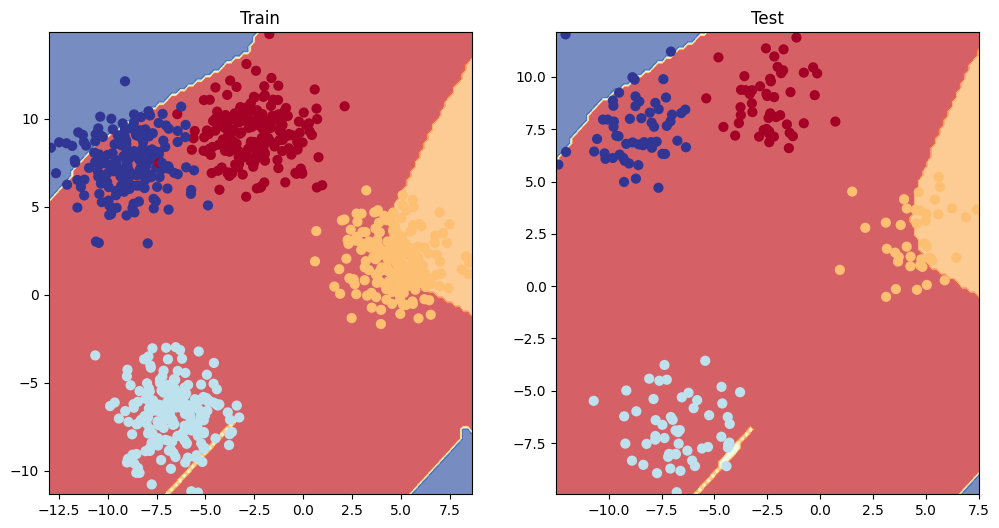

In [52]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_2, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_2, X_blob_test, y_blob_test)

Not good...Let's train our model

### 3. Creating a training loop and testing loop for multi-class PyTorch model

In [53]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [54]:
# Fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to the target deivce
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Loop through the data
for epoch in range(epochs):
  ### Training
  model_2.train()

  y_logits = model_2(X_blob_train)
  y_pred = torch.softmax(y_logits, dim = 1).argmax(dim = 1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true = y_blob_train,
                    y_pred = y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing
  model_2.eval()
  with torch.inference_mode():
    test_logits = model_2(X_blob_test)
    test_preds = torch.softmax(test_logits, dim = 1).argmax(dim = 1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true = y_blob_test,
                           y_pred = test_preds)

  # Print what is happening
  if epoch % 10 == 0:
    print(f'Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f} | Test Loss: {test_loss:.2f} Test acc: {test_acc:.2f}')

Epoch: 0 | Loss: 1.1588, Acc: 40.38 | Test Loss: 1.08 Test acc: 48.00
Epoch: 10 | Loss: 0.6448, Acc: 96.75 | Test Loss: 0.66 Test acc: 97.50
Epoch: 20 | Loss: 0.4254, Acc: 98.50 | Test Loss: 0.43 Test acc: 100.00
Epoch: 30 | Loss: 0.2529, Acc: 99.12 | Test Loss: 0.25 Test acc: 99.50
Epoch: 40 | Loss: 0.1123, Acc: 99.25 | Test Loss: 0.10 Test acc: 99.50
Epoch: 50 | Loss: 0.0663, Acc: 99.25 | Test Loss: 0.06 Test acc: 99.50
Epoch: 60 | Loss: 0.0507, Acc: 99.25 | Test Loss: 0.04 Test acc: 99.50
Epoch: 70 | Loss: 0.0430, Acc: 99.25 | Test Loss: 0.03 Test acc: 99.50
Epoch: 80 | Loss: 0.0384, Acc: 99.25 | Test Loss: 0.03 Test acc: 99.50
Epoch: 90 | Loss: 0.0352, Acc: 99.25 | Test Loss: 0.03 Test acc: 99.50


In [55]:
# Make predictions
model_2.eval()
with torch.inference_mode():
  y_logits = model_2(X_blob_test)

y_logits[:5]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466]])

In [56]:
# Go from logits - Prediction prob
y_pred_probs = torch.softmax(y_logits, dim = 1)
y_pred_probs[:5]

tensor([[1.3437e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05]])

In [57]:
# Go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim = 1)
y_preds[:5]

tensor([1, 3, 2, 1, 0])

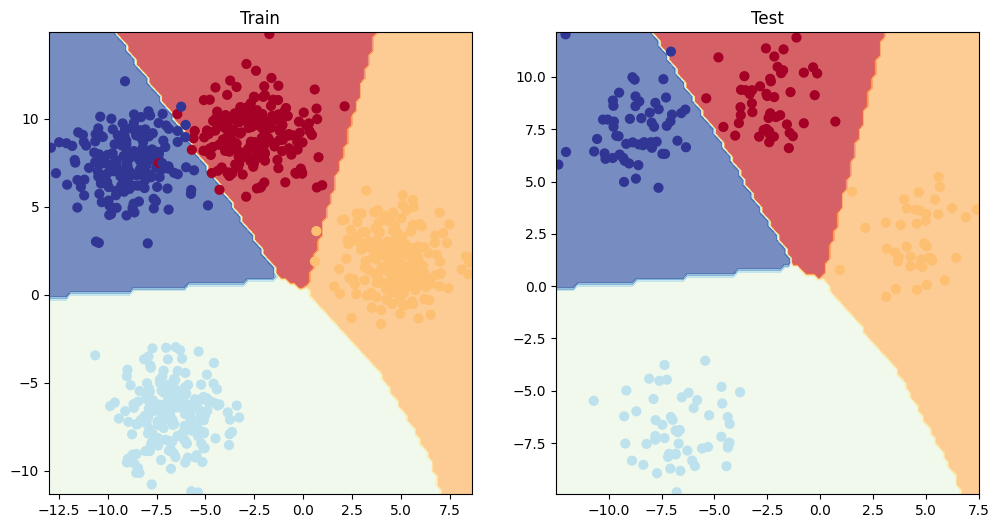

In [58]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_2, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_2, X_blob_test, y_blob_test)

## Spiral

This is a non-linearity multi-class classfication exercise from this [dataset](https://cs231n.github.io/neural-networks-case-study/)

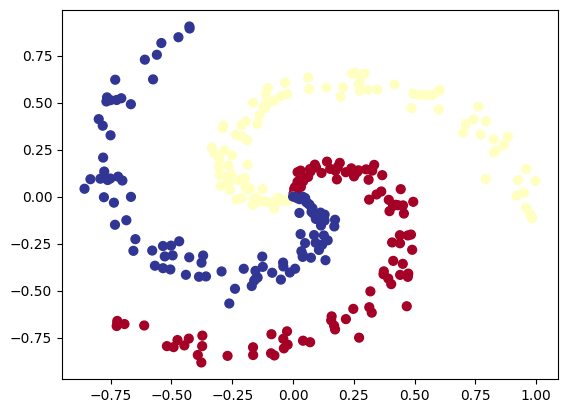

In [59]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [60]:
# Turn data into tensors
import torch
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = RANDOM_SEED)
len(X_train), len(y_train), len(X_test), len(y_test)

(240, 240, 60, 60)

In [61]:
X[:5], y[:5]

(tensor([[0.0000, 0.0000],
         [0.0001, 0.0101],
         [0.0042, 0.0198],
         [0.0125, 0.0276],
         [0.0046, 0.0401]]),
 tensor([0, 0, 0, 0, 0]))

In [62]:
y

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [63]:
# Let's calculuate the accuracy for when we fit our model
!pip -q install torchmetrics # colab doesn't come with torchmetrics
from torchmetrics import Accuracy

acc_fn = Accuracy(task="multiclass", num_classes=4).to(device)
acc_fn

MulticlassAccuracy()

In [64]:
# Prepare device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create model by subclassing nn.Module
class ModelCS231(nn.Module):
  def __init__(self, in_features, out_features, hidden_units = 8):
    super().__init__()
    self.linear1 = nn.Linear(in_features = in_features, out_features = hidden_units)
    self.linear2 = nn.Linear(in_features = hidden_units, out_features = hidden_units)
    self.linear3 = nn.Linear(in_features = hidden_units, out_features = hidden_units)
    self.linear4 = nn.Linear(in_features = hidden_units, out_features= out_features)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.linear4(self.relu(self.linear3(self.relu(self.linear2(self.relu(self.linear1(x)))))))

# Instantiate model and send it to device
model2 = ModelCS231(in_features = 2,
                    out_features = 3,
                    hidden_units = 8).to(device)

In [65]:
# Setup data to be device agnostic
device = 'cuda'if torch.cuda.is_available() else 'cpu'

# Print out first 10 untrained model outputs (forward pass)
print("Logits:")
## Your code here ##
with torch.inference_mode():
  y_logits = model2(X_train)
print(y_logits[:5])
print("Pred probs:")
## Your code here ##
print(torch.softmax(model2(X_train)[:5], dim = 1))
print("Pred labels:")
## Your code here ##
print((torch.softmax(model2(X_train)[:5], dim = 1)).argmax(dim = 1))

Logits:
tensor([[ 0.2434,  0.2060, -0.0471],
        [ 0.2430,  0.2077, -0.0488],
        [ 0.2451,  0.2114, -0.0487],
        [ 0.2448,  0.2574, -0.0636],
        [ 0.2478,  0.2430, -0.0536]])
Pred probs:
tensor([[0.3688, 0.3553, 0.2759],
        [0.3687, 0.3559, 0.2754],
        [0.3687, 0.3565, 0.2748],
        [0.3640, 0.3686, 0.2674],
        [0.3656, 0.3639, 0.2705]], grad_fn=<SoftmaxBackward0>)
Pred labels:
tensor([0, 0, 0, 1, 0])


In [66]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2.parameters(),
                             lr = 0.02)

In [67]:
# Build a training loop for the model
epochs =1000

# Loop over data
for epoch in range(epochs):

  ## Training
  model2.train()

  # 1. Forward pass
  y_logits = model2(X_train)
  y_pred = torch.softmax(y_logits, dim = 1).argmax(dim = 1)

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = acc_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ## Testing
  model2.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model2(X_test)
    test_pred = torch.softmax(test_logits, dim = 1).argmax(dim = 1)
    # 2. Caculate loss and acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(test_pred, y_test)
  # Print out what's happening every 100 epochs
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.2f} Acc: {acc:.2f} | Test loss: {test_loss:.2f} Test acc: {test_acc:.2f}")

Epoch: 0 | Loss: 1.10 Acc: 0.40 | Test loss: 1.10 Test acc: 0.47
Epoch: 100 | Loss: 0.21 Acc: 0.93 | Test loss: 0.21 Test acc: 0.92
Epoch: 200 | Loss: 0.10 Acc: 0.97 | Test loss: 0.07 Test acc: 0.98
Epoch: 300 | Loss: 0.07 Acc: 0.97 | Test loss: 0.06 Test acc: 0.97
Epoch: 400 | Loss: 0.05 Acc: 0.98 | Test loss: 0.07 Test acc: 0.98
Epoch: 500 | Loss: 0.03 Acc: 0.99 | Test loss: 0.10 Test acc: 0.98
Epoch: 600 | Loss: 0.02 Acc: 0.99 | Test loss: 0.11 Test acc: 0.98
Epoch: 700 | Loss: 0.02 Acc: 0.99 | Test loss: 0.08 Test acc: 0.98
Epoch: 800 | Loss: 0.02 Acc: 0.99 | Test loss: 0.04 Test acc: 0.98
Epoch: 900 | Loss: 0.02 Acc: 0.99 | Test loss: 0.01 Test acc: 1.00


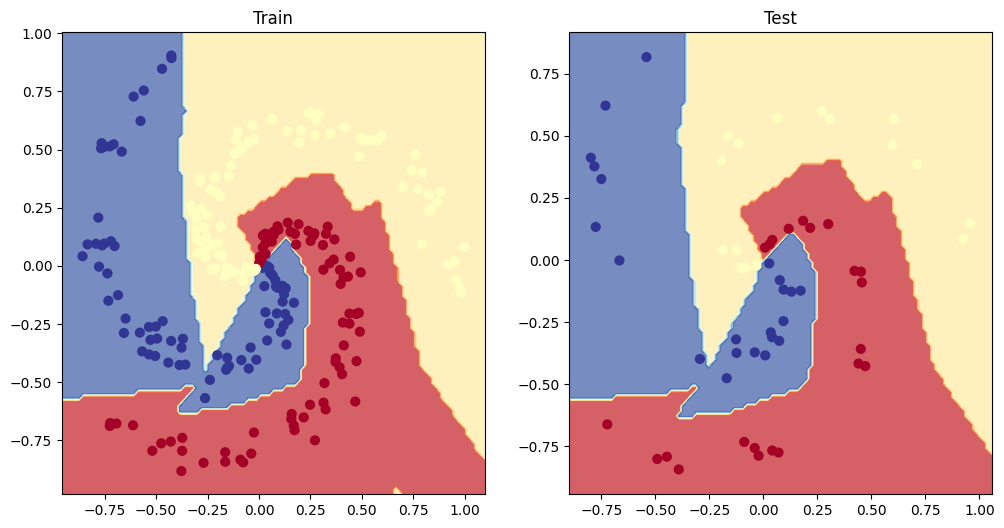

In [68]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model2, X_test, y_test)